<a href="https://colab.research.google.com/github/Friso1987/Droogtemonitor/blob/main/Droogtemonitor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget
!pip install geopandas
!pip install pandasai

In [2]:

import wget
import os
import multiprocessing
import zipfile
import numpy as np

def run_process(url, output_path):
    wget.download(url, out=output_path)
    # TODO: you can write your rename logic at here using os.rename


if __name__ == '__main__':
    cpus = multiprocessing.cpu_count()
    max_pool_size = 4
    pool = multiprocessing.Pool(cpus if cpus < max_pool_size else max_pool_size)
    base_dir = os.path.dirname(os.path.abspath('/content/'))
    prefix_list = ["daggegevens"]
    download_list = []
    name_list = list(range(209, 399))
    #name_list.extend(["zoom_side", "zoom_sole", "zoom_side-thumb"])
    for prefix in prefix_list:
        path = os.path.join(base_dir, '/content')
        if not os.path.exists(path):
            os.mkdir(path)
        if not os.path.isdir(path):
            exit()
        for name in name_list:
            download_list.append(['https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/{p}/etmgeg_{n}.zip'.format(n=name, p=prefix), path])

    for url, path in download_list: # change here to download other files
        #print('Beginning file download with wget module {n}'.format(n=url))
        pool.apply_async(run_process, args=(url, path, ))




    # add your code here to download other files
    pool.close()
    pool.join()
    print("finish")

finish


In [3]:
import pandas as pd

dir_name = '/content/'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

        #df = pd.read_csv(item[:-4]+".txt")
        #df.columns = df.columns.str.replace(' ', '')




In [4]:
260
import glob

files = glob.glob('/content/etmgeg*.txt')

dfp = pd.DataFrame()
dfe = pd.DataFrame()

for file in files:
  f = open(file, 'r')
  Lines = f.readlines()
  count = 0

  for line in Lines:
    if line[0] == '#':
     break
    count += 1

  dat = pd.read_csv(file, skiprows=count, delimiter=',', skipinitialspace=True)
  dat.columns = dat.columns.str.replace(' ', '')
  if ('RH' in dat.columns) and ('EV24' in dat.columns):

    dat.index = pd.to_datetime(dat['YYYYMMDD'],format='%Y%m%d')

    dat = dat.loc[:, dat.columns.intersection(['RH','EV24'])]

    start_date = '2023-03-01'
    end_date = '2024-01-01'

    mask = (dat.index >= start_date) #& (dat.index <= end_date)
    dat = dat.loc[mask]

    if (sum(dat['RH']!='     ')!=0) and (sum(dat['EV24']!='     ')!=0):
      dat['RH'] = dat['RH'].astype('float')
      dat['EV24'] = dat['EV24'].astype('float')

      dat['RH'][dat['RH'] < 0] = 0
      dfp[file[-7:-4]] = dat['RH']

      dat['EV24'][dat['EV24'] < 0] = 0
      dfe[file[-7:-4]] = dat['EV24']

      print('Station ' +file[-7:-4]+ '  is succesful')
    else:
      print('Station '+file[-7:-4]+ '  has no data')




#dfp.head()

Station 310  is succesful
Station 316  is succesful
Station 260  is succesful
Station 279  is succesful
Station 283  is succesful
Station 356  is succesful
Station 269  is succesful


<ipython-input-4-7ea47630d4b3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['RH'] = dat['RH'].astype('float')
<ipython-input-4-7ea47630d4b3>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['EV24'] = dat['EV24'].astype('float')
<ipython-input-4-7ea47630d4b3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

Station 344  is succesful
Station 370  is succesful
Station 209  is succesful
Station 257  is succesful
Station 286  is succesful
Station 251  is succesful
Station 280  is succesful
Station 380  is succesful
Station 391  is succesful
Station 330  is succesful
Station 312  is succesful
Station 265  has no data
Station 313  is succesful
Station 273  is succesful
Station 340  is succesful
Station 210  has no data
Station 240  is succesful
Station 258  is succesful
Station 278  is succesful
Station 331  is succesful
Station 350  is succesful
Station 229  is succesful
Station 225  is succesful
Station 343  is succesful
Station 235  is succesful
Station 242  is succesful
Station 308  is succesful
Station 290  is succesful
Station 324  is succesful
Station 315  is succesful
Station 375  is succesful
Station 248  is succesful
Station 267  is succesful
Station 377  is succesful
Station 285  is succesful
Station 348  is succesful
Station 277  is succesful
Station 275  is succesful
Station 319  i

RHmed en EV op een foute manier

In [5]:
dfstat = pd.DataFrame()

dfstat['RHavg'] = dfp.mean(numeric_only=True, axis=1).round(decimals=1)
dfstat['RHmed'] = dfp.median(numeric_only=True, axis=1).round(decimals=1)

dfstat['EV24avg'] = dfe.mean(numeric_only=True, axis=1).round(decimals=1)
dfstat['EV24med'] = dfe.median(numeric_only=True, axis=1).round(decimals=1)


#dfstat.head()

Bepalen van verschil tussen regenval en evapotranspiratie

In [6]:
dfe.max()

310    57.0
316     NaN
260    58.0
279    57.0
283    56.0
356    57.0
269    57.0
344    58.0
370    58.0
209     NaN
257    58.0
286    55.0
251    57.0
280    56.0
380    57.0
391    57.0
330    58.0
312     NaN
313     NaN
273    57.0
340     NaN
240    58.0
258     NaN
278    57.0
331     NaN
350    58.0
229     NaN
225     NaN
343     NaN
235    58.0
242     NaN
308     NaN
290    57.0
324     NaN
315     NaN
375    58.0
248     NaN
267    56.0
377    56.0
285     NaN
348    58.0
277    56.0
275    58.0
319    58.0
270    56.0
215    58.0
323    58.0
249    57.0
dtype: float64

In [7]:
dfpe = dfp - dfe

sumlm = np.frompyfunc(lambda a,b: 0 if a+b > 0 else a+b,2,1)

for kolom in dfpe.columns:
  dfpe[kolom] = sumlm.accumulate(dfpe[kolom].values, dtype=np.object) * -0.1

dfpe[dfpe < 0.00001] = 0

dfpe = dfpe.astype(float)

dafa = pd.DataFrame()

dafa['25q'] = dfpe.quantile(q=0.25, axis=1)
dafa['75q'] = dfpe.quantile(q=0.75, axis=1)
dafa['10q'] = dfpe.quantile(q=0.10, axis=1)
dafa['90q'] = dfpe.quantile(q=0.90, axis=1)

dafa['avg'] = dfpe.mean(axis=1).round(decimals=1)
dafa['med'] = dfpe.median(axis=1).round(decimals=1)



<ipython-input-7-280619ac63c5>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfpe[kolom] = sumlm.accumulate(dfpe[kolom].values, dtype=np.object) * -0.1
<ipython-input-7-280619ac63c5>:6: RuntimeWarning: invalid value encountered in accumulate
  dfpe[kolom] = sumlm.accumulate(dfpe[kolom].values, dtype=np.object) * -0.1


<ipython-input-8-a1a06e4cf757>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfstat['ptekortavg'] = sumlm.accumulate(dfstat.RHtekortavg.values, dtype=np.object) * -0.1
<ipython-input-8-a1a06e4cf757>:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfstat['ptekortmed'] = sumlm.accumulate(dfstat.RHtekortmed.values, dtype=np.object) * -0.1


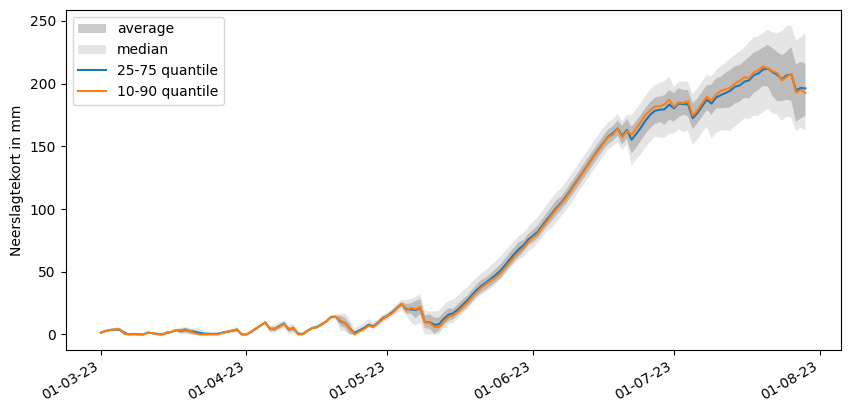

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


dfend = pd.DataFrame()

dfstat['RHtekortavg'] = dfstat['RHavg'] - dfstat['EV24avg']
dfstat['RHtekortmed'] = dfstat['RHmed'] - dfstat['EV24med']

sumlm = np.frompyfunc(lambda a,b: 0 if a+b > 0 else a+b,2,1)
dfstat['ptekortavg'] = sumlm.accumulate(dfstat.RHtekortavg.values, dtype=np.object) * -0.1
dfstat['ptekortmed'] = sumlm.accumulate(dfstat.RHtekortmed.values, dtype=np.object) * -0.1

dfend = pd.merge(dfstat,dafa, left_index=True, right_index=True)
dfend.drop(columns=['RHmed', 'RHavg', 'EV24avg', 'EV24med', 'RHtekortavg', 'RHtekortmed'], axis=1, inplace=True)

#dafa.plot(figsize=(10,5), xlabel="", ylabel="Neerslagtekort in mm")

fig, ax = plt.subplots(1, 1, sharex=True, figsize=[10,5])
ax.fill_between(dafa.index, dafa['25q'], dafa['75q'], facecolor='grey', interpolate=True, alpha = 0.4)
ax.fill_between(dafa.index, dafa['10q'], dafa['90q'], facecolor='grey', interpolate=True, alpha = 0.2)
ax.set_ylabel('Neerslagtekort in mm')
ax.plot(dafa.index, dafa['avg'], label='average')
ax.plot(dafa.index, dafa['med'], label='median')



fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(xfmt)



plt.legend(['average', 'median', '25-75 quantile', '10-90 quantile'], loc='upper left')
plt.savefig(fname='/content/droogtemonitor.jpg')


In [9]:
dfpe.tail()

,310,316,260,279,283,356,269,344,370,209,...,377,285,348,277,275,319,270,215,323,249
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2023-07-25,252.6,NaN,199.7,188.5,169.6,232.8,191.3,225.3,199.7,NaN,...,193.9,NaN,206.9,179.3,173.4,202.2,183.0,239.5,264.0,221.0
2023-07-26,254.0,NaN,198.1,188.4,172.3,236.1,193.2,229.3,202.1,NaN,...,197.7,NaN,209.8,172.1,175.5,203.5,177.2,239.9,265.7,220.0
2023-07-27,238.8,NaN,185.0,165.5,157.2,225.4,179.3,215.2,188.7,NaN,...,185.9,NaN,196.2,164.8,162.0,189.6,170.3,225.6,249.4,209.7
2023-07-28,240.3,NaN,186.8,167.9,159.8,227.3,181.7,217.2,190.7,NaN,...,186.8,NaN,198.5,167.8,164.8,191.6,173.3,226.3,251.1,211.6
2023-07-29,240.6,NaN,187.3,167.3,159.7,224.3,184.6,218.9,184.4,NaN,...,175.9,NaN,198.4,170.0,166.3,193.4,176.4,222.9,250.2,214.9


In [10]:
import plotly.graph_objs as go
import plotly.express as px


fig = go.Figure([
    go.Scatter(
        name='90q',
        x=dafa.index,
        y=dafa['90q'],
        marker=dict(color="grey"),
        line=dict(width=1),
        mode='lines',
        fillcolor='lightgrey',
        fill='tozeroy',
            ),
    go.Scatter(
        name='75q',
        x=dafa.index,
        y=dafa['75q'],
        marker=dict(color="#444"),
        line=dict(width=1),
        mode='lines',
        fillcolor='silver',
        fill='tozeroy',
            ),
    go.Scatter(
        name='25q',
        x=dafa.index,
        y=dafa['25q'],
        marker=dict(color="#444"),
        line=dict(width=1),
        mode='lines',
        fillcolor='lightgrey',
        fill='tozeroy',
            ),
    go.Scatter(
        name='10q',
        x=dafa.index,
        y=dafa['10q'],
        marker=dict(color="grey"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(26,150,65,0)',
        fill='tozeroy',
            ),


    go.Scatter(
        name='average',
        x=dafa.index,
        y=dafa['avg'],
        mode='markers+lines',
        marker=dict(color='blue', size=2),
        showlegend=True
            ),
    go.Scatter(
        name='median',
        x=dafa.index,
        y=dafa['med'],
        mode='lines',
        marker=dict(color="orange", size=2),
        line=dict(width=1),
        showlegend=False
            ),
])
fig.update_layout(
    yaxis_title='Neerslagtekort in mm',
    title='Neerslagtekort',
    hovermode="x",
)

fig.show()

#import plotly.express as px
#fig = px.line(dafa, x=dafa.index, y=['avg','med'])
#fig.show()
fig.write_html("/content/dm.html")

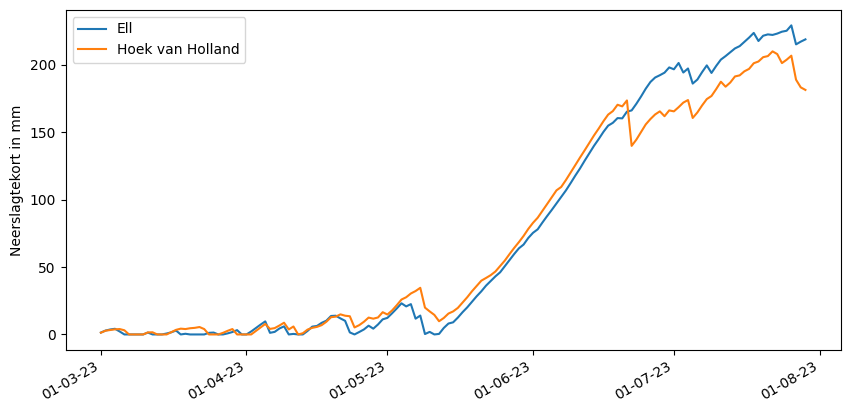

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=[10,5])
ax.set_ylabel('Neerslagtekort in mm')
#ax.plot(dfpe.index, dfpe['377'], label='Ell')
#ax.plot(dfpe.index, dfpe['330'], label='Hoek van Holland')
#ax.plot(dfpe.index, dfpe['391'], label='Arcen')
#ax.plot(dfpe.index, dfpe['375'], label='Volkel')
ax.plot(dfpe.index, dfpe['344'], label='Rotterdam')
ax.plot(dfpe.index, dfpe['380'], label='Maastricht')

fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(xfmt)



plt.legend(['Ell', 'Hoek van Holland', 'Arcen', 'Volkel', 'Rotterdam'], loc='upper left')
plt.savefig(fname='/content/dmext.jpg')


In [12]:


fig = go.Figure([
    go.Scatter(
        name='Ell',
        x=dfpe.index,
        y=dfpe['377'],
        marker=dict(color="grey"),
        line=dict(width=1),
        mode='lines',
        showlegend=False,
            ),
    go.Scatter(
        name='Hoek van Holland',
        x=dfpe.index,
        y=dfpe['330'],
        marker=dict(color="red"),
        line=dict(width=1),
        mode='lines',
        showlegend=False,
            ),
    go.Scatter(
        name='Arcen',
        x=dfpe.index,
        y=dfpe['391'],
        marker=dict(color="orange"),
        line=dict(width=1),
        mode='lines',
        showlegend=False,
            ),
    go.Scatter(
        name='Volkel',
        x=dfpe.index,
        y=dfpe['375'],
        marker=dict(color="green"),
        line=dict(width=1),
        mode='lines',
        showlegend=False,
            ),
    go.Scatter(
        name='Rotterdam',
        x=dfpe.index,
        y=dfpe['344'],
        marker=dict(color="purple"),
        line=dict(width=1),
        mode='lines',
        showlegend=False,
            ),


])
fig.update_layout(
    yaxis_title='Neerslagtekort in mm',
    title='Neerslagtekort',
    hovermode="closest",
)

fig.show()

#import plotly.express as px
#fig = px.line(dafa, x=dafa.index, y=['avg','med'])
#fig.show()
fig.write_html("/content/dm2.html")